# Project Name : Covid-19 tweets sentiment analysis
**Author:Nosin Ibna Mahbub**

In [39]:
#Importing all necessary libries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#loading dataset
data=pd.read_csv('main_dataset.csv',index_col=0)

In [3]:
data.head()

user_id   screen_name  \
5    15872418.0    ABSCBNNews   
7   171548670.0   RadioNLNews   
9    23517017.0       953WDAE   
10  613510703.0      matanock   
11   38489678.0  JAMA_current   

                                                 text  
5   G20 agrees to debt relief for poorest countrie...  
7   B.C. health officials are urging people to kin...  
9   The Lovely Lisa Ann Joins The Show LIVE From N...  
10  @allisonnamias @ArriolaLR As @ethanbdm referen...  
11  Study suggests higher rates of co-infection be...

In [4]:
data.shape

(357526, 3)

**For sentiment analysis we only need text columns so we will drop the other columns**

In [33]:
#droping all columns except text column
df=data.drop(['user_id','screen_name'], axis = 1) 

In [6]:
df.head()

text
5   G20 agrees to debt relief for poorest countrie...
7   B.C. health officials are urging people to kin...
9   The Lovely Lisa Ann Joins The Show LIVE From N...
10  @allisonnamias @ArriolaLR As @ethanbdm referen...
11  Study suggests higher rates of co-infection be...

**Index is not in sequence(5-7) order so we need to reset the index**

In [34]:
#reset the index
df.reset_index(inplace = True) 

In [8]:
df.drop(['index'],axis=1,inplace=True)

In [9]:
df.head()

text
0  G20 agrees to debt relief for poorest countrie...
1  B.C. health officials are urging people to kin...
2  The Lovely Lisa Ann Joins The Show LIVE From N...
3  @allisonnamias @ArriolaLR As @ethanbdm referen...
4  Study suggests higher rates of co-infection be...

In [35]:
df.shape

(357526, 2)

**It has around 357k rows .For quick analysis we will take first 50k rows**  

In [10]:
clean_data=df.iloc[:50000,:]

In [11]:
clean_data

text
0      G20 agrees to debt relief for poorest countrie...
1      B.C. health officials are urging people to kin...
2      The Lovely Lisa Ann Joins The Show LIVE From N...
3      @allisonnamias @ArriolaLR As @ethanbdm referen...
4      Study suggests higher rates of co-infection be...
...                                                  ...
49995  Nearest COVID19 case to my location is 11.89 K...
49996  The 2020 festival season is over – or is it? S...
49997  You inhumane sack of shit.\n\nI hope the Texas...
49998  “It’s Better Now Than When Obama Was In Office...
49999  Every individual has a right to a home, right ...

[50000 rows x 1 columns]

In [12]:
clean_data.shape

(50000, 1)

# Text cleaning using regular exp

In [13]:
#Clean text
#function for cleaning text
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) 
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    
    return text

clean_data['text']=clean_data['text'].apply(cleanText)

/home/moon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [14]:
clean_data

text
0      G20 agrees to debt relief for poorest countrie...
1      B.C. health officials are urging people to kin...
2      The Lovely Lisa Ann Joins The Show LIVE From N...
3        As  referenced, just saw this op-ed version ...
4      Study suggests higher rates of co-infection be...
...                                                  ...
49995  Nearest COVID19 case to my location is 11.89 K...
49996  The 2020 festival season is over – or is it? S...
49997  You inhumane sack of shit.\n\nI hope the Texas...
49998  “It’s Better Now Than When Obama Was In Office...
49999  Every individual has a right to a home, right ...

[50000 rows x 1 columns]

In [15]:
!pip install -U textblob

Requirement already up-to-date: textblob in /home/moon/anaconda3/lib/python3.7/site-packages (0.15.3)


In [36]:
#importing textblob libries
from textblob import TextBlob

# Finding subjectivity and polarity

In [17]:
# Create a function to get subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new ccolumns

clean_data['Subjectivity']=clean_data['text'].apply(getSubjectivity)
clean_data['Polarity']=clean_data['text'].apply(getPolarity)

/home/moon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/moon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [18]:
clean_data.head()

text  Subjectivity  Polarity
0  G20 agrees to debt relief for poorest countrie...      0.000000  0.000000
1  B.C. health officials are urging people to kin...      0.900000  0.600000
2  The Lovely Lisa Ann Joins The Show LIVE From N...      0.625000  0.356534
3    As  referenced, just saw this op-ed version ...      0.000000  0.000000
4  Study suggests higher rates of co-infection be...      0.347222 -0.013889

In [19]:
!pip install wordcloud

In [20]:
from wordcloud import WordCloud

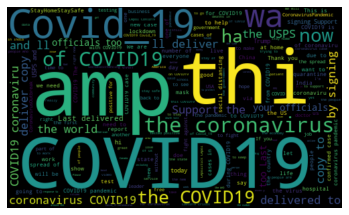

In [21]:
#Ploting Word cloud
allWords=''.join([twts for twts in clean_data['text']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## Finding Negetive , Neutral and Positive Sentiment

In [22]:
# Create function to compute the negative ,neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
clean_data['Analysis']=clean_data['Polarity'].apply(getAnalysis)
    

/home/moon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [23]:
clean_data.head()

text  Subjectivity  Polarity  \
0  G20 agrees to debt relief for poorest countrie...      0.000000  0.000000   
1  B.C. health officials are urging people to kin...      0.900000  0.600000   
2  The Lovely Lisa Ann Joins The Show LIVE From N...      0.625000  0.356534   
3    As  referenced, just saw this op-ed version ...      0.000000  0.000000   
4  Study suggests higher rates of co-infection be...      0.347222 -0.013889   

   Analysis  
0   Neutral  
1  Positive  
2  Positive  
3   Neutral  
4  Negative

In [37]:
# printing all positie tweets

j=1
sortedDF=clean_data.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i]=='Positive'):
        print(str(j) + '.' + sortedDF['text'][i])
        print()
        j=j+i

1.B.C. health officials are urging people to kind and not jump to conclusions about travellers amid the COVID19 pandemic. Shuswap kamloops  

2.The Lovely Lisa Ann Joins The Show LIVE From NYC!! -  

   

NFL MLB COVID19 Coronavirus 

LISTEN 


4.Gabriel Leung and colleagues from Hong Kong describe their actions after they were first alerted to a cluster of atypical pneumonia cases in Wuhan. A figure shows the evolution of the epidemic and the responses to date in Hong Kong. COVID19 SARSCoV2

9.Belarusian President Lukashenka, fresh out of a hockey game, to a reporter: "There are no viruses here. Did you see any of them flying around?" covid19 

Yet throughout April, the number of officially confirmed cases has roughly doubled every three days.  

17.Today's COVID19 update discusses how to care for health care workers on the front lines of the pandemic. (Plus, here are 17 steps health care orgs can take to effectively care for workers during times of crisis:  Video: 

29..’s Writers’ E

405522.  Trump supporters including Australia’s Morrison and team are supporting this attack on the World Health Organisation. During a global pandemic. These people are using any reason including lies to hide their own failures of governance in COVID19 crisis. These people are monsters

406840.Learn from history. Don't celebrate too early. COVID19 SocialDistancing 

408160.An 88 year old Egyptian man recovered from coronavirus... goodnews positivity coronavirus Covid_19 COVIDー19 COVID19 كورونا_الجديد كورونا كوڤيد_19 كوفيد١٩ كورونا_المستجد كورونا_فيروس 

409483.HOW ARE KELLYANNE CONWAY AND GEORGE CONWAY STILL MARRIED? 

COVID19 COVID1

410807.We must not be panicked by economic shutdown. Anymore than we should be panicked by an unseen enemy. Steady, resolved, determined. We got this. Merica Americans USA COVID19 COVID coronavirus

412132.You’re only as safe as the least careful person with whom you’ve come in contact. COVID19  StayingAliveTogether novelcoronavirus TakeResponsibility

4

1430132.twitch warframe  indiedev  coronavirus Streaming Streamer Covid19 Please live at 

1432612."One of the reasons I joined DST was because of the essence of JustSayHi. We have the ability to make it better for all of us." -Romie Nottage  ShelterWithoutPlace COVID19

1435094. No joke- our local theater is scrambling right now, just gave the artistic director a 30-day notice 😥 AskCait COVID19

1437577.The COVID-19 Pandemic is definitely leaving a historical mark on the world. Stay tuned to hear 2 high school students and 1 college student give their thoughts on their schools being shut down in order to prevent the spread. RemoteNewsroom BC JournalismB1 COVID19 

1440061.As usual, Trump spent several minutes of his daily coronavirus briefing Wednesday blaming Senate Democrats for blocking his nominations, EVEN THOUGH MOST OF THE VACANCIES IN THE FEDERAL GOVERNMENT ARE BECAUSE TRUMP HASN’T SELECTED ANYONE TO FILL THEM: 

1442546. We must acknowledge  worsened the COVID19 pandemic by e

seo, digitalmarketing, COVID19, coronavirus, socialmedia, makemoneyonline, internetmarketing

2837114.  If they had not been around to lie about COVID19, lending credence to CCPChina’s lies, perhaps people would have moved more quickly. Perhaps some would have heard Taiwan’s concerns and warnings.  

ChinaLiedAndPeopleDied 
ClintonLiedAndPeopleDied
RapeofHaiti

2840611. Wow, _HQ literally has no bottom. AndrewScheerHatesCanadians CPCHatesCanadians. cdnpoli Covid_19 cdnmedia

2844116.Wow, that was fast!

Trump Administration Officials Warned Against Halting Funding to WHO Leaked Memo Shows

A draft State Department memo says the move would “cede ground” to China and hobble the global response to the coronavirus pandemic. 

2847623.New York Gov. Cuomo grants himself power to control your wardrobe.

covid19 coronaOverreach  

2851131.- Rajasthan

9pm update
New - 30 Total - 1076

- Delhi

Bulletin
New - 17 Total - 1578

India Total Cases - 12,360

RajasthanFightsCorona DelhiFightsCorona I

  

4895228.We, they, haven't even begun to address the vital things that many countries implemented within days of the epidemic hitting COVID19 StayHome 

4899763.To win:

1. Send your video.

2. Tag  on Instalgram.

3. Ue the hashtag EunisellBoot.

4. Get your friends to like and follow our page.

Entries end on April 26, 2020.

Red Card COVID19 by staying at home.

StaySafe.




(2/2) 

4904300.RIP to my husband’s best friend, Jim Reed, who succumbed to COVID19 today. A  has been set up by my husband, Joseph, to raise funds for Jim's funeral expenses and to launch a grant-making fund in his memory with the  

4908838.Ya don't have to wait until 11pm to see  &amp; , they're on CBSN New York all night with the latest local coronavirus outbreak news and Maurice &amp; K.J. will be back live for  2 News at 11. WorkFromHome🏠    

4913377.We, they, haven't even begun to address the vital things that many countries implemented within days of the epidemic hitting COVID19 StayHome

4917920. D

8408684.Okay so, it’s one thing to be locked up in your homes.. but it’s literally snowing right now!? I feel like this makes Covid_19 even more worse!! Jesus Buffalo! It was almost 70 degrees a couple of days ago!!!! NewYork NewYorkTough WNY buffalove

8414683.Sacto peeps! Chipotle is BOGO today for online orders w free delivery w code BOGO415.

  whatsfordinner tipyourdeliverydriver

sacramento phish wingsuiton covi̇d19 fucktrump @… 

8420686.Sooo pretty sure my neighbor is either dead or in the hospital.

Or has reached his *78 year old bachelor* limit to interdependency and just isn't answering the phone.

In any case there's nothing for me to do I think.

coronavirus

OMG he called while I typed.
He's fine (alive)

8426690.ICYMI📺: 144  students graduate Friday, a month early. They're getting a head start on license exams to help cover for possible Pharmacist shortage during Covid_19 pandemic. 

8432699.COVID19 United States ~2500 new deaths today, another new deadliest day 💔💔💔

Ne

 WhopperQuarantaine 

11583324.Actors are not real heroes..they are just entertainer.. Our real heroes are doctors, police, nurse.. 🙏🏼 Covid_19 Quarantine jahiljamati

11590367.Humanity’s triumph over smallpox is even more awe-inspiring in today’s context. We need to empower the Edward Jenners of today to embark on similarly bold but worthy causes. We’ll all be much better off for it. Covid_19   _Gawande 

11597412.The revival will be much exquisite, Harambe or Nyayo choose your motherland philosophy.

covi̇d19
LockdownSelfiesBeforeAndAfter
MoonlightPapa

11604459.Staying home is great to minimize COVID19 exposure risk but not great to minimize exposure to mold, dust, moisture, CO2 and other things that impact indoorair and potentially your health.  Mitigate impact by open2windows. Fresh air matters!

11611508.  Thanks for supporting our COVID19 Response, we could never do this important work alone noonegoeshungry

11618559.New from me,  and Andrew Bevan: Care at the Core: A Roadmap to

16675153.Proud of our state’s residents for eschewing large gatherings and staying home to stop the spread of the coronavirus.

16683618.  You fill the bill with BS for your rich friends then go to GOP Playbooks of lies &amp; blame. Dems want to help all Americans, hospitals &amp; states. YOU are part of the problem, YOU lied &amp; helped delay the coronavirus response. You're responsible for 28,364 American Lives Lost _Dem

16692085.my prediction is we in the house until memorial day weekend.. and even after that there’s gonna be restrictions about large gatherings.. Covid_19

16700556., I urge you to cancelstudentdebt in the next coronavirus package. A StudentDebtStimulus will help the 45 million people with student debt and stimulate the economy when it is needed most.

16709028.And so the snitching begins.

Just like communist East Germany.

How deep will you let Justin Trudeau push 🇨🇦 into social communism before you've had enough?

cdnpoli covid19 trudeaumustgo 

16717503.US Stat

EveningNews washingtonstate COVID19 migrantcases 

21256639.So the usual lack of sleep whilst _a_malarkey is on night shifts working her magic as a Midwife and I can hear owls calling outside not another sound. Amazing how this pandemic brings wildlife out more and allows them to be !!! covid19 wildlife owls york nhs

21266143.Duke-NUS and  are now conducting pre-clinical studies on a COVID19 vaccine candidate they have developed. If it is seen to be safe in animals and if studies suggest that it will be safe in humans, clinicaltrials could start as soon as August.


21275649.Staying in touch with patients during shelter-in-place is challenging. CDA and  rounded up 5 ways to stay connected to patients during the pandemic. Read more here. CDAdentists dentistry COVID19 

21285157.If it’s safe for public health, we’ll provide weekend SATs every month through the end of the year, beginning in Aug. This includes new test in Sept &amp; the previously scheduled tests on August 29, Oct 3, Nov 

COVID19

26139172.Coronavirus:  Will Pro/HS sports teams play in LA in 2020 w/out spectators?  "Absolutely..if we can, for instance, test, everybody that is on a team...absolutely.  I think that is probably something we will see before stadiums are full. "       

26149700.The latest Dawgen Daily News!  Thanks to  coronavirus covid19

26160229.Singapore post coronavirus. Businesses will emerge leaner, more productive, more efficient and much, much more adaptable as they rapidly shift to a new business reality. It’s set to be a multi-cloud future. Here’s my contribution to  .
 

26170761.If true, Trump’s strategy of defunding     the WHO and holding them liable is THE right political move. COVID19 

26181294.This is proof that Donald Trump cares more about pleasing Vladimir Putin, his financial benefactor &amp; blackmailer, then saving the lives of his own citizens during an unprecedented health crisis. What ever happened to America First? coronavirus TrumpIsACompleteFailure 

26191828.


31400185.115 COVID19 vaccine candidates are under development worldwide as of Apr 8, with the advanced ones having moved into clinical development and numerous others indicating plans to begin human testing in 2020: research published on Nature Reviews Drug Discovery 

31411715.Please StayHomeSaveLives and continue to follow up with friends and family.  FaceTime and ⁦ are great ways to stay connected. ⁩ COVID19 ⁦⁩ 

31423247.thinking about my old friend   trying to recover from coronavirus --saying tonight that his amazing wife  -caring for him  - has now tested positive.   peace, love and health in this family fight against an evil virus. 



31434783.Sign this open letter to ROK President Moon Jae-in to call on the Korean government to commit to the global fight against the COVID19 pandemic, in particular in developing counties.  

31446321.US politicians have been contending the novel coronavirus is "Made in China," while global scientists, including those in the US, have not found

39266598. Honest? Your music is keeping my head up during Coronavirus  🥳

39279473.Thank you to Sarah Dawson () and  for hosting this COVID19 Q&amp;A!

Alumni &amp; all of WesternU, be sure to browse all the upcoming webinars and online learning content:  

39292350.Privacy often isn’t black and white: most interactions cause loss of privacy.

The Science - and perhaps Art - of it is to make good designs that protect privacy better than all the other alternatives - and are still useable. 

COVID19

39305228. Narrator: 45 days later most of these protesters died of COVID19 and their families blamed Obama.

39318107.These Confederate folks taking part in the MichiganProtest look so uncomfortable wearing masks to protect themselves from COVID19. They would probably be more comfortable wearing sheets on their heads.
OperationGridlock

39330987.Great discussion today on structuralracism and many messages still ring true in this time of COVID19   

39343869.HELPLINES for those suffering from

COVID19 

48651149.Be friendly to your neighbours, don’t visit the fridge every hour and control your consumption –  offers his unique cartoon guide to coping with the Covid19 crisis  

48665502.  Good to see she's staying busy during this Quarantine thing! 😱😂👍🏿💦💦💦💦 StayHomeStaySafe

48679856.Feel sorry for the citizens who live in states where leadership appears to be flirting with civil rights of U.S. citizens. There are 4 states I won't list but most know which ones. Hopefully, these so called leaders will be voted out ASAP. Tyranny Civilrights Coronavirus

48694213.Why is Trump and his allies attacking the WHO? Because by discrediting them he is trying to discredit the early warnings they gave him about the CoronavirusPandemic .  All part of his narrative of doing  everything perfectly to get us to the number one spot in deaths.

48708571._Lass bushfiremoney the new Aussie word for ‘bullshit’. 
coronavirus money will be just as invisible.

48722932.Hey Trump if you want to fast tra

55386764.. And counting... "Coronavirus: World surpasses two million confirmed cases" Coronavirus 

55402136.Also because he left quarantine to look at a house the guy he bullied was exposed. Nice Chris! loser coronavirus 

55417509.  Lots of “presumed” COVID19 deaths, why question it when we can just cower in fear. Since coronavirus was first documented in the 60’s it has been associated as being one of the viruses that causes the commoncold, colds and flu can also cause “drowning” of the lungs pneumonia.

55432883.A large part of what is missing in the COVID19 responses around the country is a lack of transparency. 

55448258.The COVID19 Checklist: Detailed steps to better protect your org and improve your security posture as well as and remote workforce, via ICIT (Institute for Critical Infrastructure Technology): InfoSec CyberSecurity  

55463634. Very different in S. Korea. The ruling party via  enabled 'science' to dictate their COVID19 responses (i.e., test/trace/treat sys) &amp

62544994.  There has been a lot of Toci used in Spain and elsewhere for COVID19 &amp; even had shortages in Spain. We should either treat on trial or wait for RCT data - CARTcells CRS is not caused by active infection where you need immunity to fight virus. Ideally combine Toci w antiviral

62561321.👏🏼🙏🏼 to all my colleagues in 🇺🇸 🇨🇴 🇪🇸 🇲🇽 🇵🇪 🇮🇹 and globally 🌐 working during these challenging CoronavirusPandemic times; 

          

62577650.Can someone please explain why  backed China's reopening of the wet markets where COVID19 came from?
I mean, you guys really kill your own credibility.

62593983.COVID19 Jamaica's Dashboard: 125 Confirmed Cases; 21 Recoveries and 5 deaths.      

62610317. Decided to share my opinion on people who hoard thousands of rolls of toilet paper. Pretty much “PLZ STOP!” CoronaVirusUpdate COVID19 toiletpaper Trending Youtube

62626655.Please share this widely, great opportunity for fishermen to get accurate information Covid_19 

62642995.Editing!! And yes 

coronavirus covid19 MCO MovementControlOrder 

71720162.Please do StayHomeStaySafe StayHomeSaveLives this is the least we could do to support the nation and ourselves to get back into our normal lives safely. CoronaWillEndSoon IndiaFightsCorona 

71737665.I’m going to buy more stock with my money.

Toilet paper and hand sanitizer made me a huge fortune.

Love panic buying very much.

I know where to put my money in for some stock.

coronavirus
panicbuying
stock
amazon

71755171.Symptoms of COVID19 seen in Boston Homeless shelters

  _First  @_HSABC  

71772679.3) Steve's wife, Penny, also tested positive for COVID-19,  was NOT admitted to the hospital, but was instead told to self-quarantine at home away alone for weeks. DEVASTATED, Penny had to say "Bye for now" to her husband, while taking care of her own case of coronavirus

71790189.'s mother already died, so she's perfectly content to let coronavirus take yours....... 

71807701.Factory Made Professional Kn95 / N95/ Kf94 Folding M

WednesdayFeels covid_19 

86097638.“Most of the times our crises are not complicated. When we keep them private they grow fatter every day, and then they start to strangle us” said Sobonfu Somé COVID19

86116826.We’d be nowhere without our first responders and medical professionals. ’s son is just one. Thank you Luke! And all those who continue to give it their all on the front lines of the coronavirus pandemic.  

86136017.Wow....this is a positive story we all need to hear right now❤️ CoronavirusUSA COVID19 

86155214.Who is going to explain to her newborn baby that she didn’t know her own mother growing up...

...because the Conservatives knew they’d be unable to cope in a pandemic nearly 4 YEARS ago and did - NOTHING? 

 

COVID19 
Nurses2020 

86174413.I just told my husband I’ve never seen the original Dune after he told me  is in the remake. So ya. Add us to the list of COVID19 quarantine divorces because he now wants nothing to do with me after that revelation 😂😂😂

86193614.(3/

100176618.UPDATE: After refusing to release numbers of inmate deaths from of COVID19, _Corrections responds tonight and acknowledges 2 inmate deaths - but won't disclose where. Why not? Also reveal 7 positive cases at Tomoka Correctional, a massive facility in Daytona Beach.

100197324.Tomorrow at 2pm CDT join HomeInstead for a FacebookLive to learn tips on how to positively manage your mindset during these challenging times. A positive mindset is crucial to mental &amp; physical health.
Watch ➡️ 
COVID19 

100218031.Do I hear “Allah, Islam” &amp; a smart attempt of using a religious undertone by the speaker? Were these people aggregated by the Mullah &amp; Darga? CoronaInMaharashtra Covid_19 

100238741.We’re a hot mess! COVID19 

100259458.   _Stothert  
Can anyone explain why the testing numbers for the state are down so much? Is this why positive results are down?     Coronaha COVID19 

100280176.3 More COVID19 Patients Discharged In Abuja  

100300897.Check here and be safe! 
Stay

113654438.COVID19 TELANGANA: After witnessing rise in Coronavirus positive cases repeatedly, the State recorded a drop in cases on Wednesday. No deaths reported.  

113676542."Welcome back, this way for quarantine!" Thais stranded in neighboring countries set to return on Saturday  thailand coronavirus covid19 

113698649.Sitting here listening to my little sister's birthday present on repeat. She gave me a video of her singing one of my fave  songs! Love you so much Jas! Best friend and the best sister in the world 
Quarantine music COVID19 quarantinebirthday 

113720759.Like with so much else, the poor are being hit hardest by the coronavirus
1.5 million New Yorkers are food insecure at the best of times
SouthBronx has the highest rates of hunger-37%in the US   
Covid_19 StarvingInUS

113742870.Just a quick reminder coronavirus is nothing new 😳
CoronavirusOutbreak Coronavirustruth 

113764982. Many people have and will die because of infection with coronavirus! We must tell the truth

128998070.Understanding the effect of the time value of money on options available to us as part of assistance programs for Covid 19. learnduit covid19 staysafe socialdistancing actuarialscience b40 bpn   via 

129021648.No shit. Covid_19  

129045227.Indians are capable of finding the drug against Covid_19 we guys have to do something for pandemic !! Antibodies of these enjection may be cure as i think but need some advancement    i am still researching and capturing on this virus !! 

129068810.As rumored, the device features the same design as the iPhone 8, but it includes upgraded internals — like the same A13 Bionic processor as the iPhone 11 — and new camera capabilities. [source: TheVerge]

iphonese iphonese2 apple tech technology news covid19 coronavirus 

129092396.Whether hair-cutting services  will be considered as essential services in new guidelines of Lockdown2? JustAsking

Majority 60% of voters not considered hair-cutting as essential services.

Covid_19 RevisedCovidGui

144054644.You’ll be learning the art of a great coverup only from the best teacher! XijinpingVirus COVID CCPCorruption 習大大 通商寬衣 習主席好棒棒 WinnieThePooh XiWinnie CoronavirusOutbreak ChinaLiedPeopleDied WHOLiedPeopleDied 

144079635.Thanks   and  for this inspiring conversation on assessment for remotelearning during COVID19 schoolclosure. Much to dig into as we keeplearning2020 

144104630.I think it’s a pretty good bet that Covid_19 started in a Chinese lab.

It’s a 100% lock that no matter the origin, the way the Chinese government handled CoronavirusOubreak weaponized the virus 

144129629.Coronavirus economic impact will continue in some way, shape or form – Goldman Sachs  Coronavirus Macroeconomics UnitedStates

144154630.Sitting at home, in your sweatpants, discovering new pods, and providing funds to those most impacted by Covid_19? How bloody good. Psyched for the  line-up we’ve got planned. Bring your friends and buy a festival pass to podapalooza! 🎧🥳 

144179632.Come on Buckeyes 

161702119.COVID-19 and emerging viral infections: The case for interferon lambda | Journal of Experimental Medicine | Rockefeller University Press  coronavirus covid19 pandemic

161728613."honest error" EmoryUniversity (Atlanta, Georgia) MD or more fittingly, fraudulent researcher, fabricator, backstabber, liar, etc....
news truth schoolofmedicine Emory conspiracy trump medical university covid19 neurology surgeon 

 

161755108.UK pregnant nurse died from coronavirus, but baby saved. 

161781604.Take your mentally soft, whinny, complaining, privileged uninformed, brainless, heartless selves home and don’t come out to protest until the health care workers and their families are relaxing in their homes safe and healthy. Covid_19 

161808101.It has been close to a month since MCOMalaysia was enforced. Find out from four journalists in Malaysia on which trending COVID19 related topics they are keen to cover. 

READ MORE:  

PRNewswireAsia Coronavirus MalaysiaCovid19 

161834600.I tested p

stayhomesavelives stayhealthy besafe coronavirus nepal subaru subarunepal suvinnepal  carsinnepal forester xv safestcarinnepal familycar travelnepal 

182188453.A student says he should receive refunds after his Philadelphia school, Drexel University, closed amid the COVID-19 pandemic sweeping the world. Learn more:   drexel university school education coronavirus covid19 

182216542.Tomorrow at 2pm CDT join HomeInstead for a FacebookLive to learn tips on how to positively manage your mindset during these challenging times. A positive mindset is crucial to mental &amp; physical health.
Watch ➡️ 
COVID19 

182244632.This is brilliant   👏🏿👏🏿👏🏿👏🏿👑👑👑   COVID19SouthAfrica  COVID19 

182272723.World Vs Corona Virus....
Stay Home Stay Safe.... There Is No Place like Home.....  We will defeat covid-19
2019nCoV Cronavirus Covid_19 Covid19India PMCARES DMGB WhoCanSave_The_World SalmanKhan ABPNEWS  

182300815.We’re StayingAliveTogether! Due to COVID19, I’m spending a lot of time in my room. Here


203830914.Dividends for the rich, layoffs for the rest.  via  COVID19 coronavirus NotMeUs DemExit GoGreen2020

203860609.India's total number of Coronavirus positive cases rises to 12,380 (including 10,477 active cases, 1489 cured/discharged/migrated and 414 deaths): Ministry of Health and Family Welfare

203890306.Out of the 929 samples which were tested yesterday, 21 have tested positive for Coronavirus : King George's Medical University, Lucknow

203920004.Covid19India 23rd day of CoronaVirus lockdown in India. What time has come! "Human Beings are locked in but animals are out". This is Kalyug, a lot more inhuman will come. Don't loose shine even in this tough time. Rise and Shine.

203949704.We are selling the rest of the feeders tomorrow. Hoping for the best 
COVID19 

203979405.The cumulative loss to global GDP between 2020 and 2021 from the covid19 pandemic could be around USD 9 trillion, greater than Japan and Germany's economy combined.

204009107.Projects across the infrast

226582632.SalmanKhan never tries to milk on any religion or Govt,its just that he has the guts to speak &amp; stand by what is ✔️,we must respect &amp; thank Health &amp; Police dept for their services during this Covid_19 lockdown,if u r hurt by his words simply ignore him &amp; his films,Truth hurts. 

226613856.Groups that are gaining more power during the CoronavirusOutbreak:

- Governments
- Central banks
- Silicon Valley
- The Chinese (probably)

Well, I don't want any of those groups to have more power 😒

226645081.Bestday !! So inspiring! Our local hospital in Mobile,  Discharged a patient After Beating COVID19 !! Look at all the people that were there to celebrate!! Amazing! Inthistogether HealthCareHeroes survival  

226676307. And in the meantime kick ALL kids out of Dubai schools this week who haven't paid their fees yet. Shame on _ME  for not even having conducted the means testing as promised  surely this is not allowed?  mydubai COVID19 pandemic elearning

226707535. The

250749104.   Then why are Florida's testing numbers steadily decreasing?coronavirus DeSantisBetrayedFlorida

250781894.Roque: Ideally, quarantine should continue until we flatten the curve, but the livelihood of Filipinos must also continue. COVID19 LuzonLockdown

250814685. Sir
Your message is crystal clear. This is to be implemented at each levels of our Honourable Government.
Even in critical times we are importing from China! ❌
Critical time of Covid_19 is the awesome start time of  _INDIA _CDRI _IND _NDelhi

250847477.Here's what recovery looks like in a country known for its best practices in managing covid19
covid19 SouthKorea 

250880270.  can u pls highlight how Govt is fighting people while handling CoronavirusOutbreak ! These people are highly skilled in throwing stones, spitting on nurses and police .... 

250913064.Pinterest is adding a new set of businesses to its Pinterest Shop showcase, in order to help provide promotion for those impacted by COVID-19
covidindia COVID C

StayHomeStaySafe

274716361.breaking catsjudgingKellyanne COVIDIOT Covid_19 she said what ? Covid 1-18 ? ha surreal CatsOfTwitter CatsOfTheQuarantine some getoff on lying their idea of fun weak people 

274750716.CORONAVIRUS USA SAT 
high school students will be able to take at-home SAT &amp; ACT. Many colleges have suspended requirement to submit  test results bec. of disruption caused by virus. These tests are widely criticized for exacerbating eco. inequality they penalize poor families

274785072.World surpasses two million confirmed cases Coronavirus 

274819430.Relax and watch Iflix.

Watch your favorite movies and shows from Iflix and get 50%Cashback.

Simply Tap and Renew your Subscription fee from Khalti Bazaar.

Download Now : 

StayHomeStaySafe PayViaKhalti BingeWatch IflixandKhalti 

274853789.My latest for  on why $CSL looks solid long-term after its COVID19 update


274888150. to move 700 non-critical coronavirus positive patients from hospitals to Covid Care Centres  

2

 👍👍👍 

297474353.Some art I created for IStandWithWhitmer free to share/credit plz thatwomanfrommichigan art StayHome lockdown governorWhitmer COVID19 pandemic 

297510113. Thanks right sir. Together we can fight this battle of Covid_19

297545878.Most heartbreaking part of these eol COVID19 conversations with families is when they ask, voice breaking, “will he be alone?” Thankful to our nurses for staying with them and for helping the families say goodbye . It feels incomplete; we are doing the best we can.

297581644. More than 2 million people infected by the pandemic | 128,000 deaths

Latest updates |  cases per million population👇


Covid_19 COVID19outbreak

297617413.I’d feel more relaxed if we changed levels once Ashley Bloomfield's daily numbers fall into the single digits. covid19

297653184.Real stores will close due to a declared state of emergency, and Amazon-use and dependence on the shipping company will increase.

What if the shipping company becomes an infected cluster?

317611408.I miss basketball so much 🏀😭covid19

317648317.What is AntibioticResistance❓

Learn while you StayHome, through these comics by our young SuperheroesAgainstSuperbugs ()!👇🏾

🔗

A takeaway from these comics relevant to the COVID19 times?⬇ Antibiotics don't work against viruses! 

317685228. _EU    New times call for new thinking, especially to finance the aftermath of COVID19 The Economic governance review is a good starting point for public debate. More here: 

317722141.   Rich, to do it earlier, we need a good independent bookstore in EST to sponsor. Any booksellers in Vermont, New Hampshire, or upstate NY interested in nonfiction, the Mormon trek West and the battle for public lands? AmericanZion  Bonus on COVID19 &amp; Spillover?

317759056.Another fall in new COVID-19 cases in Thailand  thailand coronavirus covid19 

317795973.It wasn't that long ago

When trying to guess who

The Masked Singer was, was

The biggest problem 

most people

Shared

realDonaldTrump FoxNews C

WFH WorkFromHome MCO Coronavirus Covid19 MovementControlOrder 

349953336.Always follow the instructions given by ur government to protect your self from this pendemic
Stay home
 Stay safe Coronavirus

349992064.Despite the tragic impact, consequences and workload of COVID19 I’ve noticed that the sun continues to rise and set and, when we are able to meet again, we’ll need to be ‘on it’ in some areas of policing like never before. DII is one....  It was good to catch up! 

350030794.The Curious Case Of Karnataka ’s New COVID19 Cluster — A Pharma Company In Mysuru Whose Owner Is Yet To Be Found
Nanjangudu  via 

350069525.Nearly 300 migrant workers gathered at Surat in Pandol industrial area at 4 pm yesterday for the 2nd consecutive day.
"Some pretty isues related to the food being served to them," said Assistant Commissioner of Police DJ Chavda.
Corona COVID19 COVID lockdown Coronavirus 

350108257.I have created a video, turning the COVID-19 Genome Into Sound (SARS-CoV-2 Genome) – Par

coronavirus

371078862.Walking up Fillmore Street
I spy
A half a loaf of discarded bread
Behind a solid piece of human feces
Nearly all the shops are boarded
And yet
It’s a gorgeous day
Roads are empty
Air is clean
Sky a brilliant blue
And everyone’s smiling
Beneath their masks coronavirus poem

371118664.Thanks Governor ! Our frontline medical workers and first responders inspire us everyday during COVID19! LightAZBlue AZTogether 

371158468.Covid_19 lockdown Mental Health Guide.

See the positive side of the lockdown. Instead of the "I'm stuck mentality" see this as an opportunity to work on your home and your goal.⁣
Covid_19 StayHomeSaveLives StayingAliveTogether    

371198273.Funny that it auto corrected to not COVID19

371238080.We are going through collective trauma with COVID19. Loss of life, change in lifestyle, we’ll never be the same &amp; we can heal together. Listen to our tinymission set with  our trauma therapist for our program. She has great tips for healing. _Women 



My vote for  

396982008.USDINR will be favorable after we win Covid_19 . ChinaVirus will destroy the economy of entire world. India will rise and become worldleader under Govt. of Modi ji.
Jai Hind🚩

397023125. Trump thinks it's his money he wants the receiver to know it. Why does he think this way. Trump claims he cares but thousands have been laid off at his hotels he wont even step up donate his rooms to COVID19 causes. The mans a total fraud. 

397064243.Barack Obama foresaw a pandemic like this 6 years ago.

 barely foresaw Coronavirus 1-2 months ago when it was already raging across the world. 

397105366.Iranshootsdownplane  KobeBryantdied ConquerCOVID19 coronavirus covid19 covid192020 
2020 has been put on hold. We will get through this, we will make necessary adjustments, and we will be very strong in the end! 

397146493.By prolonging Covid19 outbreak with lockdown of healthy people Tories are killing NHS staff. Stop the Lockdown now 

397187623.Ministry of commerce just iss

wwereleases stimuluspayment lockdown Covid_19 GhTwitterAwards wwereleases vodafoneboykot Dialo

427520636.S/o to everyone following me! I really appreciate it. Here is a treat for you.  coronavirus my600lblife WallsOlympics Survivor40 Covid_19 5minuteartist BANGBANGCON

427563311.This is not a joke... Kano please stay home and stay safe..

Kano 
StayHomeStaySafe 

427605987.   We hear a lot of noise about a shortage of PPE and rightly so. 
But it would be welcoming to also hear 'we need more ventilators' for COVID19 patients as the death toll passes the 13,000 mark today. 
prioritisation aninconvenienttruth

 r4today

427648664.Really good article on how social distancing saved thousands of American lives during the1918 flu pandemic:  dataviz covid19 

427691345.Tourism will restart in many ways post Covid_19. What are the odds for adoption of technology solutions for hosting MICE in a virtual world?
sttaconsulting
StayAtHome 
FlattenTheCurve 

427734027.TEASER TRAILER.  . . JOIN US ON

460700826.‘The Chinese government is understating number of deaths... from the Covid_19 virus, to delude its own people over fact it’s still not under control, &amp; to tell rest of the world it has triumphed over the pandemic’ says _ASPI to 



460745094.Interested?  contact us for more! And please give us a like and share our post PNC coronavirus persconferentie COVID wwereleases MrsAmerica USBank iPhoneSE WHO StayAtHome GOLD 

460789364.Trump &amp; others are beating the drum for “re-opening the country” as they say the rate of growth of new COVID19 cases is dropping..

..WHILE coincidentally🙄less COVID19 testing is being done? 

460833638.

Great minis from 
Available 
Stay home and paint miniatures - coronavirus Covid_19

coolminiornot
ColorQuest 
boardgames boardgame
tabletop 
j2s 
tabletopgames 
artwork artworks 
Concept 
miniaturepainting 

460877913.They're an army of crafters, kitting out the Isle of Wight's frontline workers in the coronavirus COVID19 battle. Meet those taki

493527043.Rural roads often have sharp bends and can be narrow. If you're making an essential journey on these roads, please give yourself time to react to any unexpected hazards.There are more families out walking &amp; cycling and farm vehicles COVID19 

493572830.Drive-up mobile testing sites for COVID19 are now open in LA County and City of LA. Learn more:  

493618618.Been following COVID19 since 78k cases, back when it was just a simple epidemic. Astounding that it's now at 2M with no sign of even slowing globally. pandemic

493664407.  It's the same mindset that thought of the photo opportunity of  carrying a box into a warehouse was a good use of his time. Quite unbelievable really. COVID19

493710201.105 new COVID-19 cases in Gujarat; state tally mounts to 871: Health official coronavirus lockdown StayHome 

493755997. _arthur That protest is paid for by billionaires who are sitting safely away from coronavirus, with top notch private health care, in their mansions. 
MichiganP



523667584.Why can’t the furloughed staff funded by the tax payers go and work on the farms with a 20% top up along with those physically abled unemployed people. justsaying COVID19

523714662.Given how easy it is for the coronavirus to spread it isn’t surprising that there are more local infections in Bulawayo . I have observed that many aren’t wearing masks or socially distancing. I hope the news of further infections will shake people out of their complacency.

523761743.FIFA braces for legal battle over players' contract extension  fifa football premierleague chelsea coronavirus

523808826.Census 2011 showed the highest migration data in the history of independent India &amp; not one  TV debate on how prepared our cities are. Instead, we discussed Smart Cities. Must listen to this interview of _org  COVID19 MigrantWorkers HumanRights

523855910.china made a bioweapon in a lab  in wuhan to destroy us economy knowingly. They even didnt care their own population. They have to pay for

547559711.   Nice John! Love your rapier like wit. EducationintheTimeofCOVID COVID19 25thfor45th 

547607818.Which nation is more civilized?
🇮🇷 or 🇺🇸 ?

Armed Michigan residents in US protest against stay_at_home order calling it tyranny!

People in IRAN Adjusted to Life during COVID_19 outbreak and stayed home even in Nowruz , Iranian New Year!



547655928.This is a great video for my friends who want to learn about viruses. Just in case you have some free time due to COVID Please stay inside a bit longer and learn something new! 😎
Thank you  and thank you to the medicalcaregivers and scientists trying to end COVID19 

547704040.My heart breaks for the developing world.  I admire this man.  One of Pakistan's greatest cricketers turned PM.  He speaks compellingly for Global_Initiative_Debt_Relief for the countries of the developing world. Hunger Starvation Covid_19 

547752153.New order now for just £2.
Limited stock available so be quick

avonrep avonlady avonmummy corona britishtoge

Read more: 

571484602.What life after coronavirus could look like 

READ MORE: 

cdc coronavirus covid19 mers outbreak pandemic sars ViralOutbreak virus who 

571533758. 
COVID19 
JsRandomReflections

I'm really OVER this Social_Distancing caper.   I'm moving to Arrakis. I bet the Fremen have the virus in order. 🤐 

571582915.. 's sunkissed avatar will take your breath away  Covid_19 Quarantine pollywoodbeauty latest news downloads santabanta 

571632074.Saw this grand lady striving in her farm.She smiles to me, a smile that lightens me up. I realize she knows how to grow her own food and that she grows my food too. Salutes to many such fine souls we are indebted to, forever. ThursdayThoughts Covid_19 lockdown gratitude 

571681235.    Lockdown slows down the transmission only and only where strict social distancing is practiced, at home and away. It does not work where there's no social distancing. If you don't undetstand this, you will not understand anything useful about combating 

## Ploting Polarity vs Subjectivity

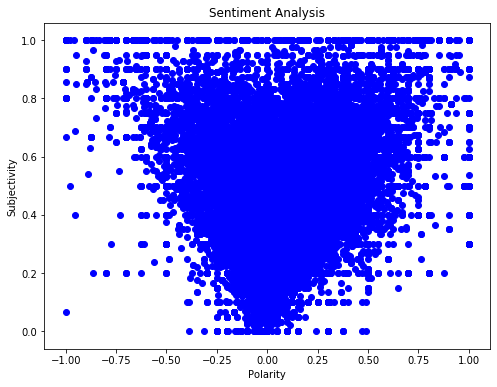

In [25]:
plt.figure(figsize=(8,6))
#for i in range(0,clean_data.shape[0]):
plt.scatter(clean_data['Polarity'],clean_data['Subjectivity'],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

## Finding percentage of positive and negetive sentiment

In [28]:
# Get  the  percentage of positive tweets...........
ptweets=clean_data[clean_data.Analysis=='Positive']
ptweets=ptweets['text']
round((ptweets.shape[0]/clean_data.shape[0]) *100 , 1)

47.1

In [29]:
# Get  the  percentage of negetive tweets...........
ntweets=clean_data[clean_data.Analysis=='Negative']
ntweets=ntweets['text']
round((ntweets.shape[0]/clean_data.shape[0]) *100 , 1)

20.0

In [30]:
# value counts
clean_data['Analysis'].value_counts()

Positive    23559
Neutral     16439
Negative    10002
Name: Analysis, dtype: int64

## Ploting the Positive ,negative and neutral sentiment

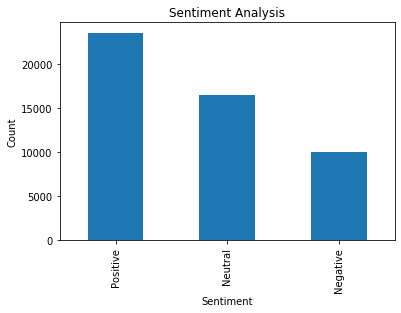

In [31]:
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
clean_data['Analysis'].value_counts().plot(kind='bar')
plt.show()